In [1]:
## import basic library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [2]:
## import csv file to pandas
df = pd.read_csv('craft-cans/beers.csv', encoding = 'latin1')

## importing df with predefined data types columns
#df = pd.read_csv('craft-cans/beers.csv', encoding='latin1', dtype={'id':object, 'brewery_id':object, 'style':object})

In [3]:
## inspect head of df
df.head()

,index,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
## convert df to pandas dataframe
df1 = pd.DataFrame(df)

In [5]:
## inspect first five rows of new df
df1.head()

,index,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [30]:
## inspect last five rows of new df
df1.tail()

,index,abv,ibu,id,name,style,brewery_id,ounces
2405,2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0
2409,2409,0.052,NaN,84,Rail Yard Ale (2009),American Amber / Red Ale,424,12.0


In [6]:
## drop unwantede column
df2 = df1.drop(columns=['index'])

In [7]:
## inspect changes
df2.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [8]:
## inspect information about df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
name          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [9]:
## inspect data types for df
df2.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [10]:
## change column data types 
df2['id'] = df2.id.astype(object)
df2['brewery_id'] = df2.brewery_id.astype(object)

In [11]:
## inspect changes for data types
df2.dtypes

abv           float64
ibu           float64
id             object
name           object
style          object
brewery_id     object
ounces        float64
dtype: object

In [12]:
## check out the description statistics of df
df2.describe()

,abv,ibu,ounces
count,2348.000000,1405.000000,2410.000000
mean,0.059773,42.713167,13.592241
std,0.013542,25.954066,2.352204
min,0.001000,4.000000,8.400000
25%,0.050000,21.000000,12.000000
50%,0.056000,35.000000,12.000000
75%,0.067000,64.000000,16.000000
max,0.128000,138.000000,32.000000


In [13]:
## write simple function that converts column to desired result 
def convertabv(alchohol):
    abv_convert = alchohol * 100
    return abv_convert

In [14]:
# create a new df object to make new changes
df3 = df2
## apply function to df and make a new column 
df3['abv2'] = df2.abv.apply(convertabv)

In [15]:
## inspect changes 
df3.head()

,abv,ibu,id,name,style,brewery_id,ounces,abv2
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,6.6
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,7.1
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,9.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,7.5


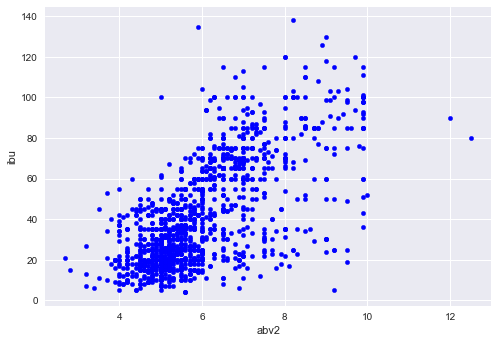

In [16]:
## plot basic scattered plot in pandas using two features
df3.plot.scatter(x='abv2', y='ibu', c='b')

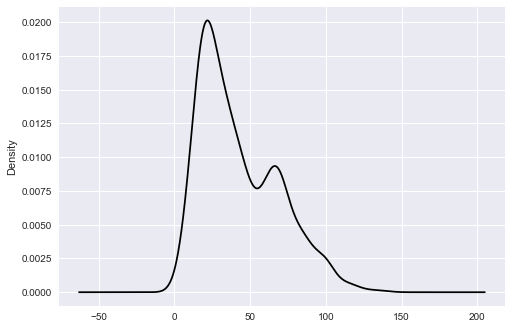

In [17]:
## do a basic density plot for one feature
df3.ibu.plot.density(c='black')

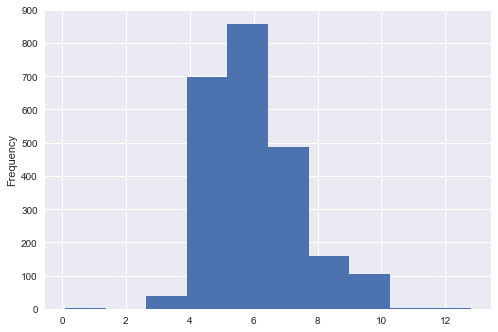

In [18]:
## plot a histogram for one feature
df3.abv2.plot(kind='hist')

In [19]:
### dealing with categoriecal data 
## create an object that contains value counts for desired categorical feature
brewery_counts = df3.brewery_id.value_counts()

## create another object that contains only the top ten
top_brewery_counts = brewery_counts[0:9]

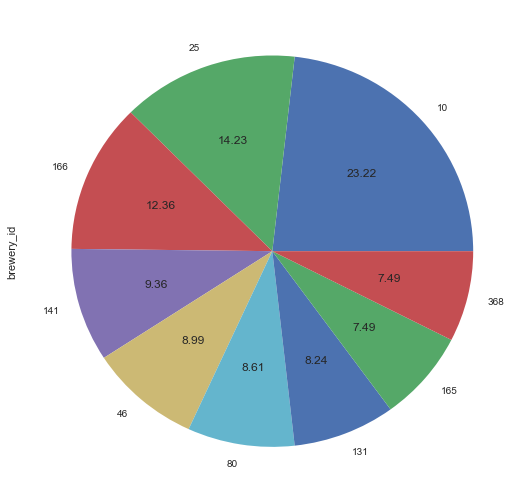

In [20]:
## make a pie chart representing the top ten calculated by pct and changing the figure size
## save that pie chart in an obect called 'pie1'
pie1 = top_brewery_counts.plot.pie(autopct='%.2f', figsize=(9, 9))

In [21]:
## make a set that contains ten strings that represent the top ten categorical features
brewery_id_labels = ['A-brewery','B-brewery','C-brewery','D-brewery','E-brewery','F-brewery',
                     'G-brewery','H-brewery','I-brewery','J-brewery']

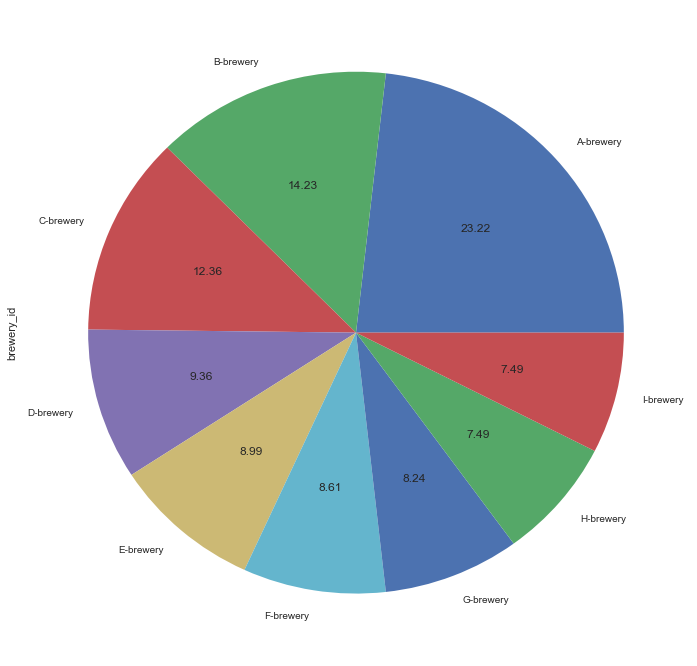

In [22]:
## add labels to pie1 obejct and increase figure size
## save that pie chart in an obect called 'pie2'
pie2 = top_brewery_counts.plot.pie(labels = brewery_id_labels, autopct='%.2f', figsize=(12, 12))

In [23]:
## when dealing with categorical values that give you an encoding error try the following function
df3.apply(lambda x: pd.lib.infer_dtype(x.values))

/Users/saultamariz/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.lib is deprecated and will be removed in a future version.
You can access infer_dtype as pandas.api.types.infer_dtype
  


abv           floating
ibu           floating
id             integer
name            string
style            mixed
brewery_id     integer
ounces        floating
abv2          floating
dtype: object

In [24]:
## create a new object df to make new changes
df4 = df3
## create a new column named that copies the items in column as strings
df3['beer_style'] = df3['style'].astype(str)

In [25]:
## re-run the previous function to inspect dtypes of new df
df3.apply(lambda x: pd.lib.infer_dtype(x.values))

abv           floating
ibu           floating
id             integer
name            string
style            mixed
brewery_id     integer
ounces        floating
abv2          floating
beer_style      string
dtype: object

In [26]:
## print head of df 
df3.head()

,abv,ibu,id,name,style,brewery_id,ounces,abv2,beer_style
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,5.0,American Pale Lager
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,6.6,American Pale Ale (APA)
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,7.1,American IPA
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,9.0,American Double / Imperial IPA
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,7.5,American IPA


In [27]:
### dealing with categoriecal data 
## create an object that contains value counts for desired categorical feature
style_counts = df3.beer_style.value_counts()

## create another object that contains only the top ten
top_style_counts = style_counts[0:9]

In [28]:
print(top_style_counts)

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Name: beer_style, dtype: int64


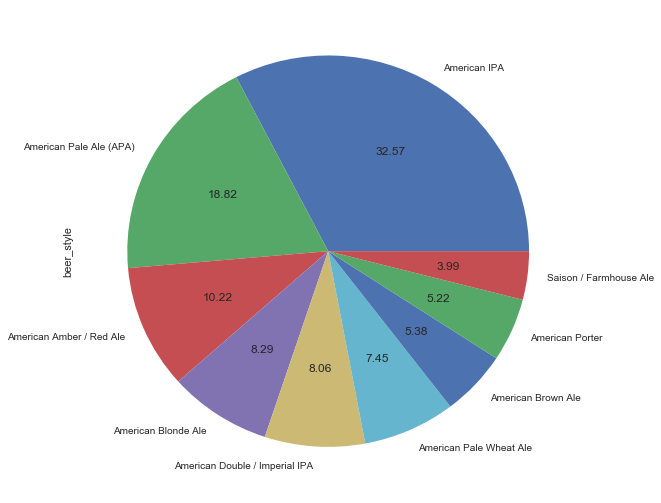

In [29]:
## make a pie chart representing the top ten calculated by pct and changing the figure size
## save that pie chart in an obect called 'pie2'
pie2 = top_style_counts.plot.pie(autopct='%.2f', figsize=(9, 9))